# <center> TWITTER ANALYTICS </center>

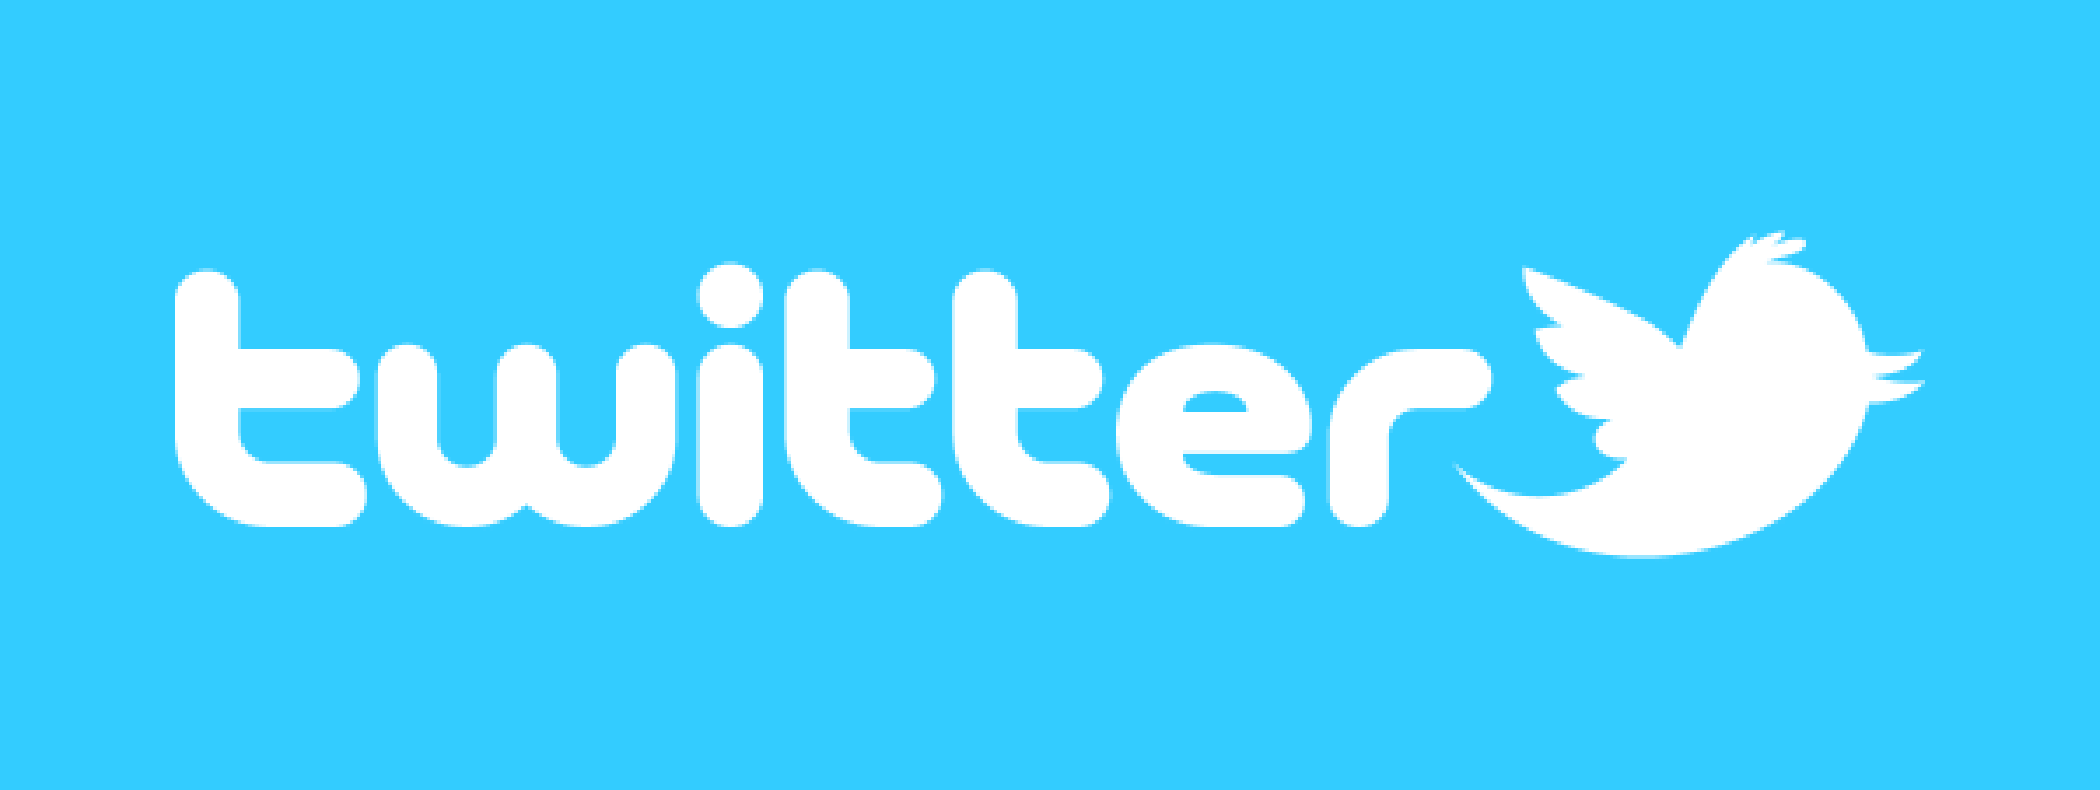


###  <center> Is Twitter a LEGITIMATE platform for Marketing Campaigns? </center>
 
### <center>We analyzed the Top 2 Valuable Sports Brands in 2019 using Twitter to understand the reach of Social Media </center>



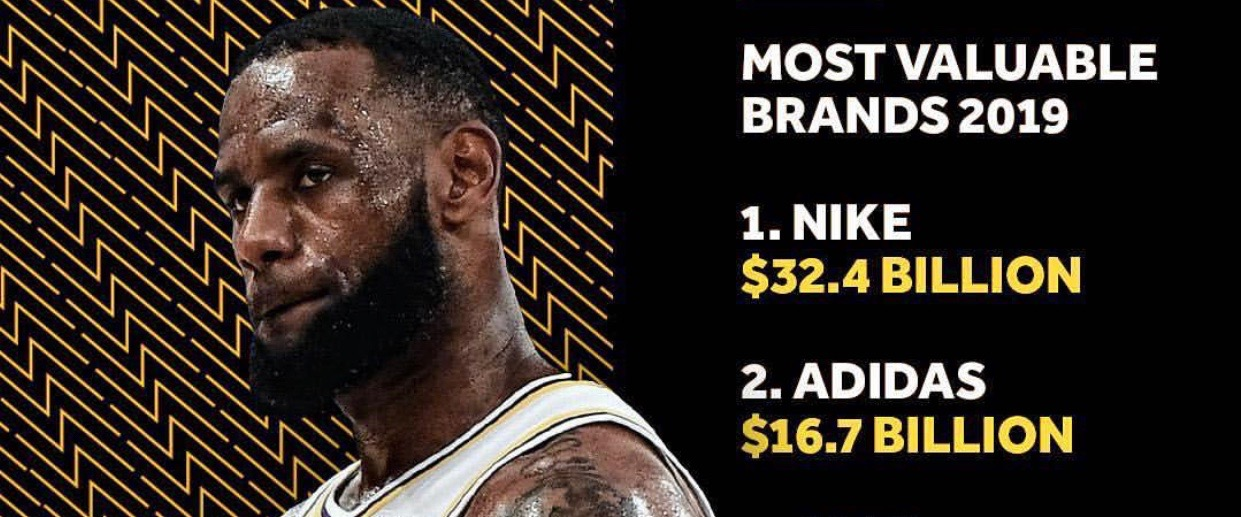

In [40]:
import pandas as pd
import matplotlib
import json
from twython import Twython
import twitter
import matplotlib.pyplot as plt
import numpy as np

In [41]:
# Load credentials from json file
with open("twitter_credentials.json", "r") as file:
   creds = json.load(file)

python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])


# <center> We Started by comparing Nike vs. Adidas </center>


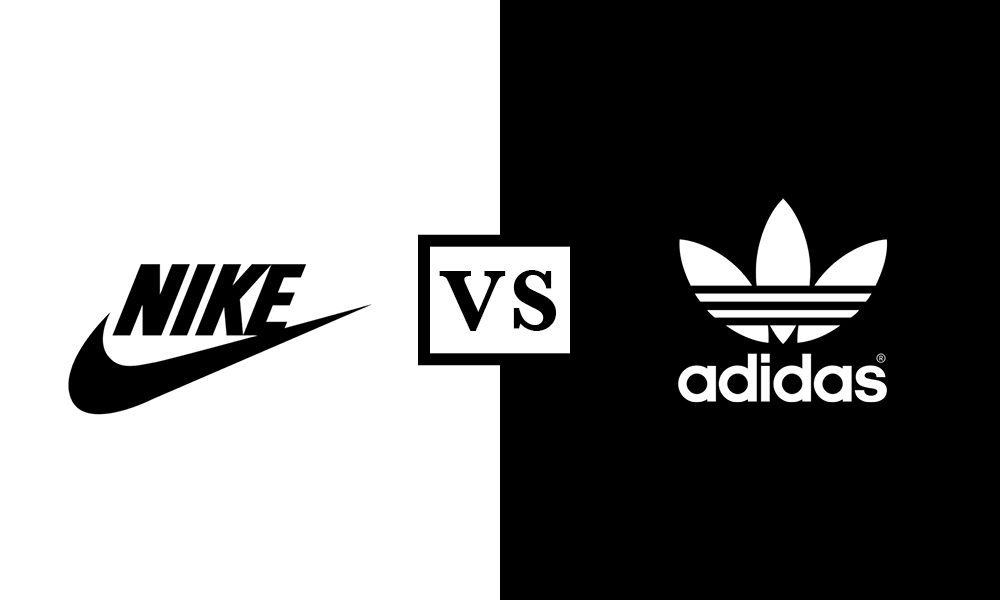

## <center> The following shows us the number of Followers and Tweets by each company </center>

In [42]:
ids = ["nike","adidas"]

output = python_tweets.lookup_user(screen_name=ids)

dict_1 = {'user': [], 'screen_name': [], 'location':[], 'description':[], 'followers_count':[], 'statuses_count':[]   }

for user in output:
   dict_1['user'].append(user['name'])
   dict_1['screen_name'].append(user['screen_name'])
   dict_1['location'].append(user['location'])
   dict_1['description'].append(user['description'])
   dict_1['followers_count'].append(user['followers_count'])
   dict_1['statuses_count'].append(user['statuses_count'])


df = pd.DataFrame(dict_1)
df.head()

,user,screen_name,location,description,followers_count,statuses_count
0,Nike,Nike,"Beaverton, Oregon",Just Do It.,7725609,35638
1,adidas,adidas,,From heavy traffic to the rugged trail. #Escap...,3570082,13756


Text(0, 0.5, 'Number of followers in million')

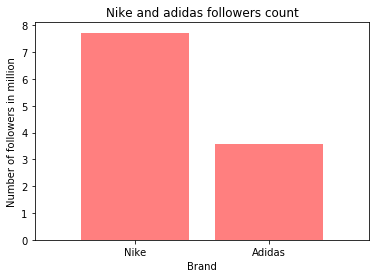

In [14]:
# Graph 1 Nike vs Adidas Followers
nikeFollowersCount = pd.DataFrame(dict_1)["followers_count"][0]/1000000
adidasFollowersCount = pd.DataFrame(dict_1)["followers_count"][1]/1000000
followersCount = [nikeFollowersCount,adidasFollowersCount]
x_axis = np.arange(len(followersCount))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, followersCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas followers count")
plt.xlabel("Brand")
plt.ylabel("Number of followers in million")


Text(0, 0.5, 'Number of status')

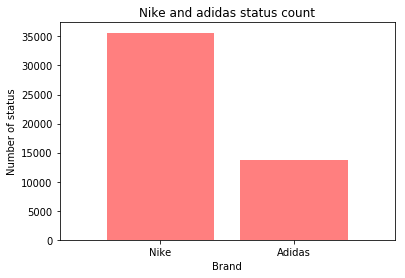

In [43]:
# Graph 2 Nike vs Adidas Status Count 
nikeStatusCount = pd.DataFrame(dict_1)["statuses_count"][0]
adidasStatusCount = pd.DataFrame(dict_1)["statuses_count"][1]
statusCount = [nikeStatusCount,adidasStatusCount]
x_axis = np.arange(len(statusCount))

# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, statusCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas status count")
plt.xlabel("Brand")
plt.ylabel("Number of status")

# <center>Next we ran a search to identify the Top 10 influencers for each company</center>
# <center>NIKE</center>

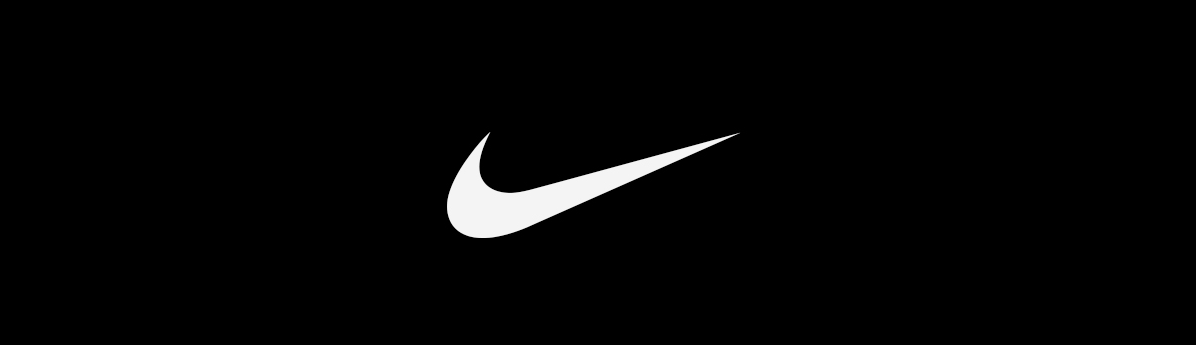

In [44]:
# Create our query
query = {'q': 'nike',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_['user'].append(status['user']['screen_name'])
   dict_['date'].append(status['created_at'])
   dict_['text'].append(status['text'])
   dict_['favorite_count'].append(status['favorite_count'])
   dict_['followers_count'].append(status['user']['followers_count'])
   dict_['user_favourites_count'].append(status['user']['favourites_count'])
   dict_['statuses_count'].append(status['user']['statuses_count'])
   dict_['user_created_at'].append(status['user']['created_at'])
   dict_['hashtags'].append(status['entities']['hashtags']) 
   dict_['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,AustinDarbo,Tue Mar 05 10:41:04 +0000 2019,Nike have been advertising the AF1 every day s...,1901,28211,26333,Sun May 24 11:26:34 +0000 2009,799,245,[]
1,MPSIslington,Tue Mar 05 21:13:34 +0000 2019,Have you seen missing 14-year-old Holly Baldwi...,47,26285,3558,Fri Dec 02 09:14:09 +0000 2011,318,16121,[]
2,FCBarcelona,Tue Mar 05 17:19:08 +0000 2019,👀 Guess who visited Camp Nou lately…\n🏋️‍♂️🏋️...,3231,29193250,2006,Tue Dec 15 09:53:50 +0000 2009,278,100872,[]
3,ComplexSneakers,Mon Mar 04 19:00:01 +0000 2019,Nike used to turn down @virgilabloh. Now he's ...,677,405255,6469,Wed Jan 26 13:05:01 +0000 2011,170,67455,[]
4,Aaron_Doh,Mon Mar 04 22:32:34 +0000 2019,I just fought a turtle that was wearing Nike e...,4388,274647,2043,Mon Sep 09 03:32:30 +0000 2013,229,4502,[]
5,overtime,Tue Mar 05 00:15:44 +0000 2019,That was ANGRY 🤬 @Nike_Beast23 (via @UNCGMBBMa...,966,265847,13862,Sat Mar 08 17:26:42 +0000 2014,212,22418,[]
6,NerdAboutTown,Tue Mar 05 00:09:53 +0000 2019,Nike snapped. 😍😍😍 https://t.co/zoiw7zg9bx,868,32685,62773,Sun Nov 07 15:27:08 +0000 2010,197,153871,[]
7,brkicks,Tue Mar 05 04:27:26 +0000 2019,.@CaldwellPope wearing the Nike KD11 “Aunt Pea...,607,275277,383,Wed Dec 16 20:17:02 +0000 2015,74,13371,[]
8,BlairRIVALS,Mon Mar 04 15:03:30 +0000 2019,"Noah Fant - Nike Opening in High School\n6-4, ...",654,12343,0,Fri Jan 21 21:05:30 +0000 2011,109,24307,[]
9,SoleCollector,Mon Mar 04 16:44:38 +0000 2019,"The ""home"" colorway of the Zoom LeBron 3 is al...",549,539598,2060,Fri Jan 23 05:11:25 +0000 2009,89,88242,[]


In [45]:
nike_followers= df['followers_count'].sum()

print(f'Nike Influencers  {nike_followers}')

nike_followers_status = df['statuses_count'].sum()
 
print(f'Nike Influencers Status {nike_followers_status}')

Nike Influencers  63029925
Nike Influencers Status 850089


# <center>ADIDAS</center>
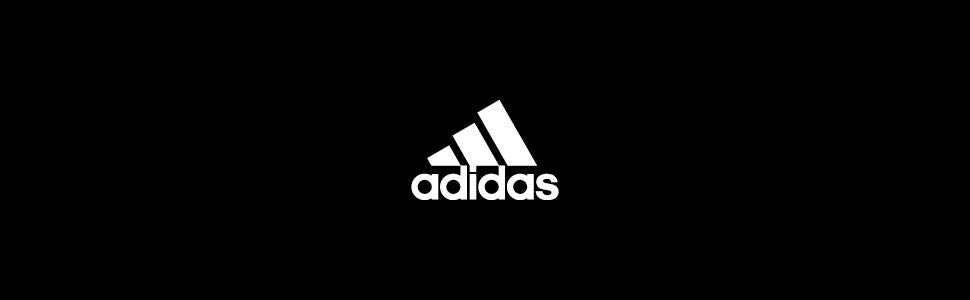

In [46]:
# Create our query
query = {'q': 'adidas',
       'result_type': 'popular',
       'count': 15,
        'lang': 'en',
       }

# Search tweets
dict_ = {'user': [], 'date': [], 'text': [], 'favorite_count': [], "followers_count":[],
        "user_favourites_count":[], "user_created_at": [] ,"retweet_count": [], "statuses_count":[], "hashtags":[] }
for status in python_tweets.search(**query)['statuses']:
   dict_['user'].append(status['user']['screen_name'])
   dict_['date'].append(status['created_at'])
   dict_['text'].append(status['text'])
   dict_['favorite_count'].append(status['favorite_count'])
   dict_['followers_count'].append(status['user']['followers_count'])
   dict_['user_favourites_count'].append(status['user']['favourites_count'])
   dict_['statuses_count'].append(status['user']['statuses_count'])
   dict_['user_created_at'].append(status['user']['created_at'])
   dict_['hashtags'].append(status['entities']['hashtags']) 
   dict_['retweet_count'].append(status['retweet_count'])


df = pd.DataFrame(dict_)
df.sort_values(by='followers_count', ascending=True)
df.head(15)

,user,date,text,favorite_count,followers_count,user_favourites_count,user_created_at,retweet_count,statuses_count,hashtags
0,adidasfootball,Tue Mar 05 09:03:45 +0000 2019,"Lights, camera, action. 🎬\nDavid Beckham &amp;...",1663,3465835,796,Thu Nov 25 15:31:32 +0000 2010,815,29809,"[{'text': 'Predator', 'indices': [88, 97]}]"
1,adidasoriginals,Tue Mar 05 19:00:02 +0000 2019,YEEZY BOOST 350 V2 HYPERSPACE. AVAILABLE MARCH...,1899,4021865,9288,Sun Feb 08 03:04:25 +0000 2009,347,17430,[]
2,FootyAccums,Tue Mar 05 09:33:38 +0000 2019,Adidas have released a limited edition of Davi...,3380,594337,109489,Wed Mar 09 18:11:42 +0000 2011,390,821311,[]
3,MPSIslington,Tue Mar 05 21:13:34 +0000 2019,Have you seen missing 14-year-old Holly Baldwi...,47,26285,3558,Fri Dec 02 09:14:09 +0000 2011,318,16121,[]
4,ProD_Soccer,Tue Mar 05 11:01:01 +0000 2019,Give that man a knighthood.\n\nThe Limited Edi...,1951,123500,4254,Mon Jul 11 14:04:18 +0000 2011,351,18548,[]
5,KimKardashian,Tue Mar 05 21:09:48 +0000 2019,Uncle Charlie!!!! @CharlieWilson #SundayServic...,2901,59937443,9,Thu Mar 19 19:21:56 +0000 2009,316,28930,"[{'text': 'SundayServiceOnATuesday', 'indices'..."
6,SportsCenter,Tue Mar 05 18:16:56 +0000 2019,A federal judge has sentenced three men convic...,546,35282783,1132,Tue Mar 24 15:28:02 +0000 2009,215,107980,[]
7,HoustonRockets,Mon Mar 04 21:12:13 +0000 2019,🚀 Step Back to '95 🚀\n\n🏀 @adidasHoops\n🔥 #Har...,1807,2771066,2136,Fri Jan 16 17:48:22 +0000 2009,376,45562,"[{'text': 'HardenVol3', 'indices': [39, 50]}]"
8,PPVSRB,Tue Mar 05 16:27:14 +0000 2019,Awaiting sentencing of three men convicted in ...,130,26587,532,Fri May 20 19:58:41 +0000 2011,101,5790,[]
9,brkicks,Tue Mar 05 15:48:24 +0000 2019,The Adidas Yeezy 350 V2 “Hyperspace” releases ...,599,275277,383,Wed Dec 16 20:17:02 +0000 2015,64,13371,[]


In [47]:
adidas_followers= df['followers_count'].sum()

print(f'Adidas Influencers  {adidas_followers}')

adidas_followers_status = df['statuses_count'].sum()
 
print(f'Adidas Influencers Status {adidas_followers_status}')

Adidas Influencers  112748979
Adidas Influencers Status 1294044


In [48]:
influencers = {'Nike Influencer Count' : nike_followers, 'Adidas Influencer Count': adidas_followers}

print(f'Influencers Totals  {influencers}')

influencers_status = {'Nike Influencer Status Count' : nike_followers_status, 'Adidas Influencer Status Total Count': adidas_followers_status}

print(f'Influencers Status Totals  {influencers_status}')

Influencers Totals  {'Nike Influencer Count': 63029925, 'Adidas Influencer Count': 112748979}
Influencers Status Totals  {'Nike Influencer Status Count': 850089, 'Adidas Influencer Status Total Count': 1294044}


Text(0, 0.5, 'Number of influencer followers in million')

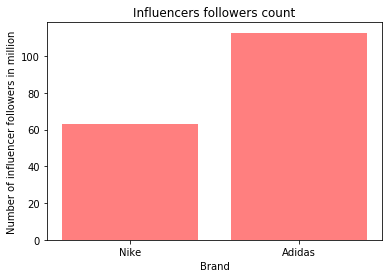

In [51]:
# TODO Nike Influencer Count Vs Adidas Influencer Count
nikeInfluencerCount = int(influencers["Nike Influencer Count"])/1000000
adidasInfluencerCount = int(influencers["Adidas Influencer Count"])/1000000

influencersCount = [nikeInfluencerCount,adidasInfluencerCount]

x_axis = np.arange(len(influencersCount))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, influencersCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
#plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Influencers followers count")
plt.xlabel("Brand")
plt.ylabel("Number of influencer followers in million")

Text(0, 0.5, 'Number of status ')

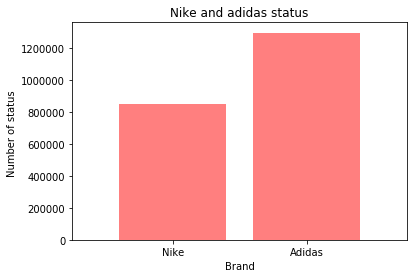

In [53]:
# Nike Influencers Status count vs Adidas Influencer Status Count

nikeInfluencerStatusCount = influencers_status["Nike Influencer Status Count"]
adidasInfluencerStatusCount = influencers_status["Adidas Influencer Status Total Count"]
statusCount = [nikeInfluencerStatusCount,adidasInfluencerStatusCount]
x_axis = np.arange(len(statusCount))
# Tell matplotlib that we will be making a bar chart
# Users is our y axis and x_axis is, of course, our x axis
# We apply align="edge" to ensure our bars line up with our tick marks
plt.bar(x_axis, statusCount, color='r', alpha=0.5, align="center")
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, ["Nike", "Adidas"])
# Sets the x limits of the current chart
plt.xlim(-0.75, len(x_axis)-0.25)

# Give our chart some labels and a tile
plt.title("Nike and adidas status")
plt.xlabel("Brand")
plt.ylabel("Number of status ")
